In [1]:
import numpy as np
import pandas as pd
import pprint as pp

import matplotlib.pyplot as plt
import seaborn as sns

from textcat.ml.validation_utils import generate_regression_metrics, read_regression_val_predictions_from_subdirectories

## Load OC20 dataframes with features and metadata

In [ ]:
df_id = pd.read_parquet('../../data/dataframes/val_id/data.parquet')
df_ood_ads = pd.read_parquet('../../../data/dataframes/val_ood_ads/data.parquet')
df_ood_cat = pd.read_parquet('../../../data/dataframes/val_ood_cat/data.parquet')
df_ood_both = pd.read_parquet('../../../data/dataframes/val_ood_both/data.parquet')
df_id['split'] = 'id'
df_ood_ads['split'] = 'ads'
df_ood_cat['split'] = 'cat'
df_ood_both['split'] = 'both'
df = pd.concat([df_id, df_ood_ads, df_ood_cat, df_ood_both])

### Define path where all trained translation models live

### Collect experiments and generate metrics

In [3]:
MODEL_DIR = '../../models/regression'

The next command explores the provided directory containing the models, and for each one collects information about the defined hyperparameters, the predictions on the validation data, and attaches them as new columns in the provided df with all the metadata/features. To know how the MODEL_DIR must be structured, check the docstring of the module containing the function.

In [4]:
df, exps = read_regression_val_predictions_from_subdirectories(df, MODEL_DIR)

Processing IS2RE_direct to relaxed energy models...


/home/smorandi/textcat/src/textcat/ml/validation_utils.py:321: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  settings['y_scaler'] = load(model_path + '/scaler.pt')
/home/smo

Processing RS2RE to relaxed energy models...


/home/smorandi/textcat/src/textcat/ml/validation_utils.py:321: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  settings['y_scaler'] = load(model_path + '/scaler.pt')
/home/smo

Processing IS2RE_translation to relaxed energy models...
(Found 37 adsorption regression models)


/home/smorandi/textcat/src/textcat/ml/validation_utils.py:321: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  settings['y_scaler'] = load(model_path + '/scaler.pt')


In [5]:
exps.keys()

dict_keys(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39'])

In [6]:
exps['1']

{'order': 'o2',
 'X': 'hetsmiles_IS_o2',
 'Y': 'eads_eV',
 'strategy': 'IS2RE_direct',
 'size_M': 6.6,
 'aug_on': True,
 'aug_off': False,
 'twall': False,
 'max_len': 512,
 'notilde': False,
 'tokenizer': GeneralTokenizer(name_or_path='', vocab_size=166, model_max_length=1000000000000000019884624838656, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
 	109: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 	127: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 	136: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 	145: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 	158: AddedTo

In [7]:
generate_regression_metrics(df, exps)

Generating metrics for 39 regression models
Experiment 1 (IS2RE_direct)
Experiment 2 (IS2RE_direct)
Experiment 3 (IS2RE_direct)
Experiment 4 (IS2RE_direct)
Experiment 5 (IS2RE_direct)
Experiment 6 (IS2RE_direct)
Experiment 7 (IS2RE_direct)
Experiment 8 (IS2RE_direct)
Experiment 9 (IS2RE_direct)
Experiment 10 (IS2RE_direct)
Experiment 11 (IS2RE_direct)
Experiment 12 (IS2RE_direct)
Experiment 13 (IS2RE_direct)
Experiment 14 (IS2RE_direct)
Experiment 15 (IS2RE_direct)
Experiment 16 (IS2RE_direct)
Experiment 17 (IS2RE_direct)
Experiment 18 (IS2RE_direct)
Experiment 19 (IS2RE_direct)
Experiment 20 (IS2RE_direct)
Experiment 21 (IS2RE_direct)
Experiment 22 (IS2RE_direct)


/home/smorandi/textcat/src/textcat/ml/validation_utils.py:399: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'abs_err{IDX}'] = df[f'err{IDX}'].abs()
/home/smorandi/textcat/src/textcat/ml/validation_utils.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'err{IDX}'] = df[exps[IDX]['Y']] - df[f'Y{IDX}']
/home/smorandi/textcat/src/textcat/ml/validation_utils.py:399: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider 

Experiment 23 (IS2RE_direct)
Experiment 24 (IS2RE_direct)


/home/smorandi/textcat/src/textcat/ml/validation_utils.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'err{IDX}'] = df[exps[IDX]['Y']] - df[f'Y{IDX}']
/home/smorandi/textcat/src/textcat/ml/validation_utils.py:399: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'abs_err{IDX}'] = df[f'err{IDX}'].abs()
/home/smorandi/textcat/src/textcat/ml/validation_utils.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider 

Experiment 25 (IS2RE_direct)
Experiment 26 (IS2RE_direct)


/home/smorandi/textcat/src/textcat/ml/validation_utils.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'err{IDX}'] = df[exps[IDX]['Y']] - df[f'Y{IDX}']
/home/smorandi/textcat/src/textcat/ml/validation_utils.py:399: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'abs_err{IDX}'] = df[f'err{IDX}'].abs()
/home/smorandi/textcat/src/textcat/ml/validation_utils.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider 

Experiment 27 (IS2RE_direct)
Experiment 28 (IS2RE_direct)


/home/smorandi/textcat/src/textcat/ml/validation_utils.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'err{IDX}'] = df[exps[IDX]['Y']] - df[f'Y{IDX}']
/home/smorandi/textcat/src/textcat/ml/validation_utils.py:399: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'abs_err{IDX}'] = df[f'err{IDX}'].abs()
/home/smorandi/textcat/src/textcat/ml/validation_utils.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider 

Experiment 29 (RS2RE)
Experiment 30 (RS2RE)


/home/smorandi/textcat/src/textcat/ml/validation_utils.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'err{IDX}'] = df[exps[IDX]['Y']] - df[f'Y{IDX}']
/home/smorandi/textcat/src/textcat/ml/validation_utils.py:399: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'abs_err{IDX}'] = df[f'err{IDX}'].abs()
/home/smorandi/textcat/src/textcat/ml/validation_utils.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider 

Experiment 31 (RS2RE)
Experiment 32 (RS2RE)


/home/smorandi/textcat/src/textcat/ml/validation_utils.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'err{IDX}'] = df[exps[IDX]['Y']] - df[f'Y{IDX}']
/home/smorandi/textcat/src/textcat/ml/validation_utils.py:399: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'abs_err{IDX}'] = df[f'err{IDX}'].abs()
/home/smorandi/textcat/src/textcat/ml/validation_utils.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider 

Experiment 33 (RS2RE)
Experiment 34 (RS2RE)


/home/smorandi/textcat/src/textcat/ml/validation_utils.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'err{IDX}'] = df[exps[IDX]['Y']] - df[f'Y{IDX}']
/home/smorandi/textcat/src/textcat/ml/validation_utils.py:399: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'abs_err{IDX}'] = df[f'err{IDX}'].abs()
/home/smorandi/textcat/src/textcat/ml/validation_utils.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider 

Experiment 35 (RS2RE)
Experiment 36 (RS2RE)


/home/smorandi/textcat/src/textcat/ml/validation_utils.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'err{IDX}'] = df[exps[IDX]['Y']] - df[f'Y{IDX}']
/home/smorandi/textcat/src/textcat/ml/validation_utils.py:399: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'abs_err{IDX}'] = df[f'err{IDX}'].abs()
/home/smorandi/textcat/src/textcat/ml/validation_utils.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider 

Experiment 37 (IS2RE_translation)
Experiment 38 (TRAINING_SET_MEAN)


/home/smorandi/textcat/src/textcat/ml/validation_utils.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'err{IDX}'] = df[exps[IDX]['Y']] - df[f'Y{IDX}']
/home/smorandi/textcat/src/textcat/ml/validation_utils.py:399: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'abs_err{IDX}'] = df[f'err{IDX}'].abs()
/home/smorandi/textcat/src/textcat/ml/validation_utils.py:398: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider 

Experiment 39 (TRAINING_SET_MEAN)


In [9]:
df_exps = pd.DataFrame(exps).transpose()
df_exps.drop(['tokenizer', 'Y', 'max_len', 'notilde', 'y_scaler', 'path'], axis=1, inplace=True)
df_exps

,order,X,strategy,size_M,aug_on,aug_off,twall,mae,rmse,r2,mdae,mae_ads,rmse_ads,r2_ads,mdaeads,mae_both,rmse_both,r2_both,mdaeboth,mae_cat,rmse_cat,r2_cat,mdaecat,mae_id,rmse_id,r2_id,mdaeid,mae_wo14,rmse_wo14,r2_wo14,mdae_wo14,mae_wo14_ads,rmse_wo14_ads,r2_wo14_ads,mdae_wo14_ads,mae_wo14_both,rmse_wo14_both,r2_wo14_both,mdae_wo14_both,mae_wo14_cat,rmse_wo14_cat,r2_wo14_cat,mdae_wo14_cat,mae_wo14_id,rmse_wo14_id,r2_wo14_id,mdae_wo14_id
1,o2,hetsmiles_IS_o2,IS2RE_direct,6.6,True,False,False,0.828,1.339,0.635,0.514,0.833,1.35,0.64,0.525,0.732,1.122,0.677,0.494,0.86,1.401,0.622,0.512,0.89,1.458,0.589,0.527,0.616,0.884,0.802,0.447,0.632,0.911,0.792,0.46,0.601,0.835,0.766,0.45,0.614,0.895,0.814,0.433,0.619,0.897,0.816,0.444
2,o2,hetsmiles_IS_o2,IS2RE_direct,6.6,True,False,True,0.752,1.09,0.758,0.53,0.786,1.147,0.74,0.549,0.713,1.011,0.738,0.519,0.741,1.082,0.775,0.515,0.767,1.117,0.759,0.536,0.671,0.954,0.769,0.49,0.691,0.977,0.761,0.503,0.645,0.888,0.735,0.489,0.668,0.966,0.783,0.476,0.683,0.983,0.779,0.492
3,o2,hetsmiles_IS_o2,IS2RE_direct,6.6,False,False,True,0.765,1.097,0.755,0.548,0.827,1.18,0.725,0.595,0.752,1.045,0.72,0.563,0.729,1.063,0.782,0.511,0.751,1.094,0.769,0.527,0.689,0.963,0.765,0.509,0.74,1.016,0.741,0.554,0.693,0.935,0.706,0.533,0.653,0.941,0.795,0.469,0.667,0.959,0.79,0.48
4,o1,hetsmiles_IS_o1,IS2RE_direct,50.9,True,False,False,0.811,1.327,0.641,0.489,0.817,1.325,0.653,0.502,0.71,1.094,0.693,0.474,0.845,1.397,0.624,0.483,0.872,1.462,0.587,0.494,0.595,0.869,0.809,0.422,0.618,0.905,0.795,0.441,0.582,0.819,0.775,0.43,0.591,0.873,0.823,0.408,0.591,0.878,0.823,0.409
5,o1,hetsmiles_IS_o1,IS2RE_direct,50.9,True,False,True,0.759,1.111,0.748,0.525,0.836,1.2,0.716,0.601,0.757,1.061,0.711,0.557,0.713,1.075,0.777,0.472,0.731,1.102,0.765,0.48,0.676,0.966,0.764,0.482,0.744,1.034,0.732,0.553,0.695,0.948,0.698,0.528,0.627,0.933,0.798,0.428,0.635,0.943,0.796,0.431
6,o1,hetsmiles_IS_o1,IS2RE_direct,6.5,True,False,False,0.813,1.323,0.643,0.495,0.812,1.316,0.658,0.509,0.709,1.09,0.696,0.474,0.851,1.4,0.623,0.494,0.881,1.458,0.589,0.508,0.604,0.877,0.805,0.43,0.623,0.91,0.792,0.446,0.585,0.822,0.773,0.432,0.601,0.884,0.819,0.419,0.606,0.891,0.818,0.424
7,o1,hetsmiles_IS_o1,IS2RE_direct,6.5,False,False,False,0.8,1.309,0.651,0.481,0.798,1.296,0.668,0.496,0.703,1.08,0.701,0.467,0.833,1.381,0.633,0.476,0.866,1.448,0.594,0.487,0.589,0.863,0.811,0.415,0.608,0.894,0.799,0.431,0.577,0.812,0.779,0.424,0.583,0.868,0.825,0.4,0.589,0.877,0.824,0.406
8,o1,hetsmiles_IS_o1,IS2RE_direct,6.5,True,False,True,0.741,1.105,0.751,0.499,0.787,1.186,0.722,0.524,0.7,1.02,0.733,0.485,0.727,1.086,0.773,0.483,0.751,1.12,0.758,0.504,0.649,0.938,0.777,0.455,0.671,0.966,0.766,0.473,0.621,0.867,0.747,0.451,0.646,0.953,0.789,0.44,0.658,0.968,0.786,0.455
9,o1,hetsmiles_IS_o1,IS2RE_direct,6.5,False,False,True,0.757,1.118,0.745,0.511,0.821,1.214,0.709,0.543,0.731,1.054,0.716,0.509,0.727,1.083,0.774,0.489,0.748,1.114,0.76,0.503,0.672,0.973,0.76,0.468,0.723,1.049,0.724,0.496,0.662,0.933,0.708,0.475,0.645,0.946,0.792,0.443,0.655,0.961,0.788,0.457
10,o2,hetsmiles_IS_o2,IS2RE_direct,51.1,True,False,False,0.791,1.314,0.648,0.47,0.775,1.272,0.68,0.48,0.687,1.064,0.71,0.457,0.838,1.416,0.614,0.466,0.864,1.468,0.583,0.478,0.565,0.822,0.829,0.406,0.576,0.836,0.825,0.421,0.558,0.786,0.793,0.414,0.564,0.838,0.837,0.392,0.563,0.828,0.843,0.399


In [10]:
pd.set_option('display.max_columns', None)
df_exps.sort_values(by='mae', ascending=True)

,order,X,strategy,size_M,aug_on,aug_off,twall,mae,rmse,r2,mdae,mae_ads,rmse_ads,r2_ads,mdaeads,mae_both,rmse_both,r2_both,mdaeboth,mae_cat,rmse_cat,r2_cat,mdaecat,mae_id,rmse_id,r2_id,mdaeid,mae_wo14,rmse_wo14,r2_wo14,mdae_wo14,mae_wo14_ads,rmse_wo14_ads,r2_wo14_ads,mdae_wo14_ads,mae_wo14_both,rmse_wo14_both,r2_wo14_both,mdae_wo14_both,mae_wo14_cat,rmse_wo14_cat,r2_wo14_cat,mdae_wo14_cat,mae_wo14_id,rmse_wo14_id,r2_wo14_id,mdae_wo14_id
36,o2,hetsmiles_FS_o2,RS2RE,51.1,False,False,True,0.511,0.768,0.88,0.356,0.526,0.801,0.873,0.363,0.503,0.733,0.863,0.36,0.507,0.772,0.885,0.351,0.506,0.766,0.887,0.349,0.473,0.713,0.871,0.334,0.486,0.741,0.862,0.342,0.465,0.67,0.849,0.34,0.472,0.724,0.878,0.328,0.47,0.715,0.883,0.326
32,o1,hetsmiles_FS_o1,RS2RE,50.9,False,False,True,0.537,0.82,0.863,0.364,0.565,0.871,0.85,0.383,0.529,0.785,0.842,0.368,0.524,0.806,0.875,0.346,0.532,0.816,0.871,0.354,0.488,0.741,0.861,0.337,0.505,0.774,0.85,0.356,0.477,0.689,0.84,0.346,0.482,0.745,0.871,0.319,0.488,0.754,0.87,0.328
34,o1,hetsmiles_FS_o1,RS2RE,6.5,False,False,True,0.548,0.833,0.859,0.375,0.574,0.878,0.848,0.394,0.54,0.795,0.838,0.382,0.535,0.821,0.87,0.356,0.544,0.834,0.866,0.364,0.497,0.751,0.857,0.348,0.515,0.784,0.846,0.366,0.488,0.699,0.836,0.362,0.489,0.755,0.868,0.327,0.497,0.767,0.865,0.335
30,o2,hetsmiles_FS_o2,RS2RE,6.6,False,False,True,0.55,0.817,0.864,0.382,0.565,0.85,0.857,0.389,0.534,0.774,0.846,0.377,0.546,0.819,0.871,0.379,0.554,0.824,0.869,0.383,0.501,0.746,0.859,0.355,0.51,0.77,0.851,0.36,0.485,0.692,0.839,0.355,0.503,0.759,0.866,0.353,0.508,0.763,0.867,0.353
35,o2,hetsmiles_FS_o2,RS2RE,51.1,False,False,False,0.646,1.021,0.787,0.411,0.642,1.016,0.796,0.411,0.568,0.857,0.812,0.396,0.676,1.078,0.776,0.416,0.699,1.115,0.76,0.424,0.496,0.731,0.865,0.362,0.502,0.75,0.859,0.365,0.476,0.674,0.847,0.363,0.501,0.748,0.87,0.357,0.506,0.75,0.871,0.362
29,o2,hetsmiles_FS_o2,RS2RE,6.6,False,False,False,0.697,1.071,0.766,0.461,0.707,1.076,0.771,0.482,0.631,0.919,0.784,0.449,0.713,1.114,0.761,0.452,0.739,1.161,0.739,0.464,0.557,0.799,0.838,0.412,0.576,0.832,0.826,0.428,0.547,0.755,0.809,0.416,0.55,0.801,0.851,0.399,0.556,0.806,0.851,0.405
13,o2,hetsmiles_IS_o2,IS2RE_direct,51.1,False,False,True,0.711,1.06,0.771,0.472,0.773,1.147,0.74,0.508,0.695,1.009,0.739,0.479,0.679,1.027,0.797,0.443,0.695,1.052,0.786,0.459,0.625,0.916,0.787,0.428,0.677,0.981,0.759,0.461,0.626,0.888,0.735,0.444,0.595,0.895,0.814,0.397,0.599,0.895,0.816,0.408
23,o2,hetsmiles_IS_o2,IS2RE_direct,6.6,True,True,True,0.712,1.063,0.77,0.479,0.748,1.128,0.749,0.5,0.672,0.981,0.754,0.469,0.703,1.054,0.786,0.465,0.724,1.084,0.773,0.482,0.613,0.892,0.798,0.432,0.633,0.919,0.788,0.445,0.591,0.83,0.768,0.432,0.609,0.902,0.811,0.419,0.621,0.915,0.808,0.433
12,o2,hetsmiles_IS_o2,IS2RE_direct,51.1,True,False,True,0.712,1.053,0.774,0.485,0.76,1.132,0.747,0.508,0.682,0.985,0.751,0.48,0.697,1.034,0.794,0.474,0.711,1.057,0.784,0.48,0.623,0.896,0.797,0.444,0.653,0.935,0.781,0.46,0.611,0.855,0.754,0.449,0.611,0.894,0.814,0.433,0.616,0.898,0.815,0.435
24,o2,hetsmiles_IS_o2,IS2RE_direct,6.6,False,True,True,0.718,1.059,0.771,0.494,0.765,1.132,0.747,0.522,0.69,0.987,0.75,0.497,0.698,1.039,0.792,0.474,0.72,1.074,0.777,0.484,0.63,0.907,0.791,0.452,0.662,0.951,0.773,0.474,0.62,0.861,0.751,0.464,0.613,0.901,0.812,0.431,0.623,0.915,0.808,0.436


Create a dataframe with: (i) top-3 IS2RE-direct models, (ii) top-3 IS2RE-translation models, and (iii) top-3 RS2RE models, and (iv) baselines

In [27]:
df_paper_table = df_exps.iloc[[35, 31, 33, 12, 22, 11, 36, 38, 37]]
df_paper_table = df_paper_table[['order', 'strategy', 'size_M', 'aug_on', 'aug_off', 'twall', 'mae', 'mae_id', 'mae_ads', 'mae_cat', 'mae_both']]
df_paper_table.sort_values(by='mae', ascending=True)

,order,strategy,size_M,aug_on,aug_off,twall,mae,mae_id,mae_ads,mae_cat,mae_both
36,o2,RS2RE,51.1,False,False,True,0.511,0.506,0.526,0.507,0.503
32,o1,RS2RE,50.9,False,False,True,0.537,0.532,0.565,0.524,0.529
34,o1,RS2RE,6.5,False,False,True,0.548,0.544,0.574,0.535,0.54
13,o2,IS2RE_direct,51.1,False,False,True,0.711,0.695,0.773,0.679,0.695
23,o2,IS2RE_direct,6.6,True,True,True,0.712,0.724,0.748,0.703,0.672
12,o2,IS2RE_direct,51.1,True,False,True,0.712,0.711,0.76,0.697,0.682
37,o1,IS2RE_translation,50.9,False,False,True,0.81,0.724,0.928,0.72,0.869
39,mean,TRAINING_SET_MEAN,0,False,False,False,1.694,1.767,1.738,1.747,1.526
38,mean,TRAINING_SET_MEAN,0,False,False,True,1.704,1.751,1.765,1.735,1.565


In [28]:
print(df_paper_table.to_latex(index=False, column_format='ccccccccccc', float_format="%.2f"))

\begin{tabular}{ccccccccccc}
\toprule
order & strategy & size_M & aug_on & aug_off & twall & mae & mae_id & mae_ads & mae_cat & mae_both \\
\midrule
o2 & RS2RE & 51.10 & False & False & True & 0.51 & 0.51 & 0.53 & 0.51 & 0.50 \\
o1 & RS2RE & 50.90 & False & False & True & 0.54 & 0.53 & 0.56 & 0.52 & 0.53 \\
o1 & RS2RE & 6.50 & False & False & True & 0.55 & 0.54 & 0.57 & 0.54 & 0.54 \\
o2 & IS2RE_direct & 51.10 & False & False & True & 0.71 & 0.69 & 0.77 & 0.68 & 0.69 \\
o2 & IS2RE_direct & 6.60 & True & True & True & 0.71 & 0.72 & 0.75 & 0.70 & 0.67 \\
o2 & IS2RE_direct & 51.10 & True & False & True & 0.71 & 0.71 & 0.76 & 0.70 & 0.68 \\
o1 & IS2RE_translation & 50.90 & False & False & True & 0.81 & 0.72 & 0.93 & 0.72 & 0.87 \\
mean & TRAINING_SET_MEAN & 0 & False & False & False & 1.69 & 1.77 & 1.74 & 1.75 & 1.53 \\
mean & TRAINING_SET_MEAN & 0 & False & False & True & 1.70 & 1.75 & 1.76 & 1.74 & 1.56 \\
\bottomrule
\end{tabular}



### Performance dependendence on training hyperparameters

<Axes: xlabel='r2', ylabel='mae'>

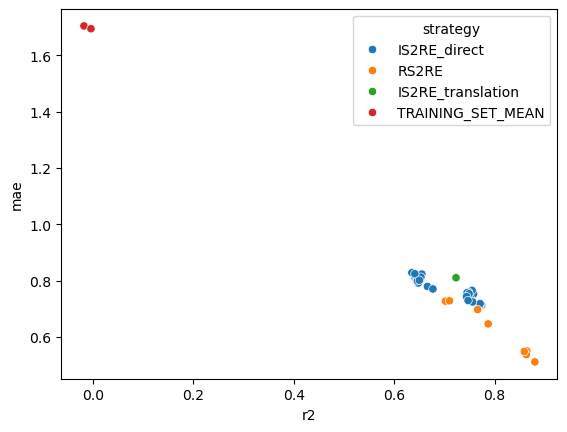

In [15]:
sns.scatterplot(df_exps, x='r2', y='mae', hue='strategy')

### Error distribution by model strategy

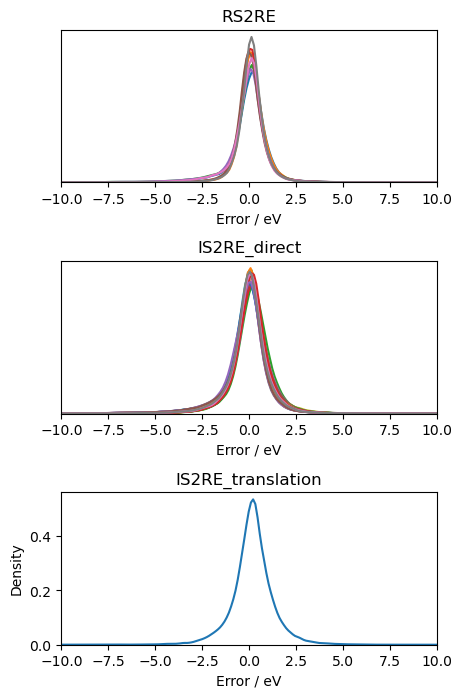

In [13]:
fig, ax = plt.subplots(3,  figsize=(12/2.54, 18/2.54))

for k, v in exps.items():
    if v['strategy'] == 'RS2RE':
        sns.kdeplot(df, x=f'err{k}', label=str(k), ax=ax[0], legend=True)
        pass
    elif v['strategy'] == 'IS2RE_direct':
        sns.kdeplot(df, x=f'err{k}', label=str(k), ax=ax[1], legend=True)
    elif v['strategy'] == 'IS2RE_translation':
        sns.kdeplot(df, x=f'err{k}', label=str(k), ax=ax[2], legend=True)

ax[0].set_xlabel("Error / eV")
ax[1].set_xlabel("Error / eV")
ax[2].set_xlabel("Error / eV")
ax[0].set_title("RS2RE")
ax[1].set_title("IS2RE_direct")
ax[2].set_title("IS2RE_translation")

ax[0].set_yticklabels([])
ax[0].set_ylabel("")
ax[0].set_yticks([])
ax[1].set_yticklabels([])
ax[1].set_ylabel("")
ax[1].set_yticks([])

ax[0].set_xlim([-10,10])
ax[1].set_xlim([-10,10])
ax[2].set_xlim([-10,10])

plt.tight_layout()
# plt.savefig("fig4.svg")

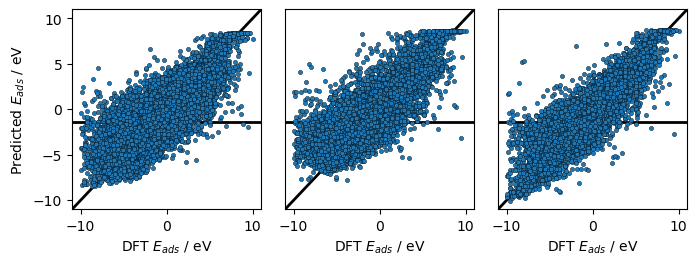

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18/2.54, 7/2.54))

s = 10
sns.scatterplot(df, x=df[exps['12']['Y']], y=df['Y12'], ax=ax[0], ec='black', s=s)
sns.scatterplot(df, x=df[exps['35']['Y']], y=df['Y35'], ax=ax[1], ec='black', s=s)
sns.scatterplot(df, x=df[exps['36']['Y']], y=df['Y36'], ax=ax[2], ec='black', s=s)

# Baseline line (Trivial model)
ax[0].hlines(df['Y37'].mean(), -11, 11, colors='black', zorder=-100, linewidth=2, label='Baseline (mean)')
ax[1].hlines(df['Y37'].mean(), -11, 11, colors='black', zorder=-100, linewidth=2, label='Baseline (mean)')
ax[2].hlines(df['Y37'].mean(), -11, 11, colors='black', zorder=-100, linewidth=2, label='Baseline (mean)')

# Parity line (Perfect model)
ax[0].plot([-11, 11], [-11, 11], color='k', linestyle='-', linewidth=2, zorder=-99, label='Parity (ideal)')
ax[1].plot([-11, 11], [-11, 11], color='k', linestyle='-', linewidth=2, zorder=-99, label='Parity (ideal)')
ax[2].plot([-11, 11], [-11, 11], color='k', linestyle='-', linewidth=2, zorder=-99, label='Parity (ideal)')

ax[0].set_xlabel("DFT $E_{ads}$ / eV")
ax[1].set_xlabel("DFT $E_{ads}$ / eV")
ax[2].set_xlabel("DFT $E_{ads}$ / eV")
ax[0].set_ylabel("Predicted $E_{ads}$ / eV")
ax[1].set_ylabel("")
ax[2].set_ylabel("")
ax[1].set_yticks([])
ax[2].set_yticks([])
# ax[0].set_title("IS2RE direct")
# ax[1].set_title("IS2RE translation")
# ax[2].set_title("RS2RE")
ax[0].set_xlim([-11,11])
ax[1].set_xlim([-11,11])
ax[2].set_xlim([-11,11])
ax[0].set_ylim([-11,11])
ax[1].set_ylim([-11,11])
ax[2].set_ylim([-11,11])


plt.tight_layout()
# plt.savefig('fig4.png', dpi=300)
# plt.savefig('fig4.svg')

In [30]:
df.columns

Index(['sid', 'anomaly', 'class', 'C', 'H', 'O', 'N', 'ads_size',
       'ads_symbols', 'ads_id',
       ...
       'err35', 'abs_err35', 'err36', 'abs_err36', 'err37', 'abs_err37',
       'err38', 'abs_err38', 'err39', 'abs_err39'],
      dtype='object', length=165)

(0.0, 0.9)

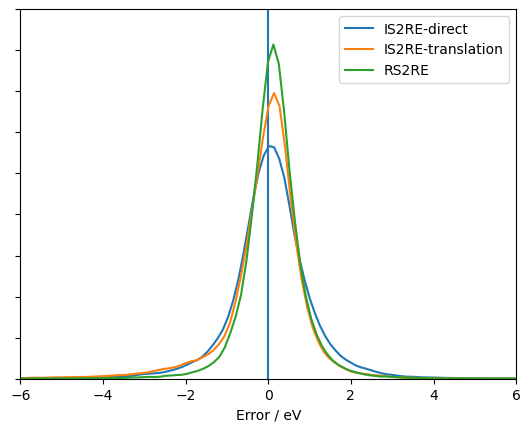

In [44]:
fig, ax = plt.subplots()

# sns.kdeplot(df, x=df['eads_eV'], ax=ax)
sns.kdeplot(df, x=df['err12'], ax=ax, label='IS2RE-direct')
sns.kdeplot(df, x=df['err35'], ax=ax, label='IS2RE-translation')
sns.kdeplot(df, x=df['err36'], ax=ax, label='RS2RE')
ax.legend()
ax.set_xlabel("Error / eV")
ax.set_ylabel("")
ax.set_xlim([-6, 6])
ax.set_yticklabels([])
ax.vlines(0, 0, 0.9, zorder=-10)
ax.set_ylim(0, 0.9)

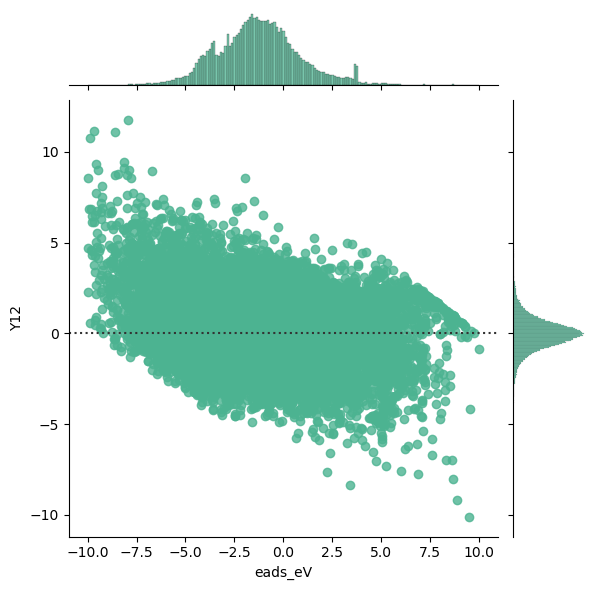

In [19]:
sns.jointplot(df, x=df[exps['12']['Y']], y=df['Y12'], kind="resid", color="#4CB391")

In [ ]:
dfv.groupby(["type"])["abs_err"].mean()

In [45]:
df_mat = df.groupby(["type", "bulk_nelems"])["abs_err"].mean()

fig, ax = plt.subplots(3, 2, figsize=(18/2.54, 23/2.54))
sns.barplot(df, x='bulk_nelems', y='abs_err', hue='type', ec='black', ax=ax[0, 0])
sns.barplot(df, x='ads_size', y='abs_err', hue='type', ec='black', ax=ax[0, 1], legend=False)
sns.barplot(df, x='C', y='abs_err', hue='type', ec='black', ax=ax[1, 0], legend=False)
sns.barplot(df, x='O', y='abs_err', hue='type', ec='black', ax=ax[1, 1], legend=True)
sns.barplot(df, x='N', y='abs_err', hue='type', ec='black', ax=ax[2, 0], legend=True)
sns.barplot(df, x='H', y='abs_err', hue='type', ec='black', ax=ax[2, 1], legend=True)
ax[0,0].sharey(ax[0,1])
ax[1,0].sharey(ax[1,1])
plt.tight_layout()

KeyError: 'type'

In [ ]:
sns.histplot(dfv, x='frh_FS_o1',hue='bulk_nelems', stat='percent', common_norm=False, multiple='dodge', shrink=0.7)

In [ ]:
sns.barplot(dfv, x='anomaly', y='abs_err', hue='type', ec='black')

In [ ]:
dfvads = dfv[dfv['type'] == 'ads']

In [ ]:
sns.barplot(dfvads, x='ads_symbols', y='abs_err')

In [ ]:
sns.barplot(dfv[dfv['type'] == 'both'], x='ads_symbols', y='abs_err')

In [ ]:
fig, ax = plt.subplots(figsize=(24, 15))
sns.barplot(dfv[dfv['type'] == 'cat'].sort_values('ads_symbols'), x='ads_symbols', y='abs_err')
plt.xticks(rotation=45)

In [ ]:
sns.barplot(dfvads, x='anomaly', y='abs_err', hue='frh_FS_o1')

In [ ]:
r2_train = r2_score(df_train['eads_eV'], df_train[YY])
r2_id = r2_score(df_id['eads_eV'], df_id[YY])
r2_ood_ads = r2_score(df_ood_ads['eads_eV'], df_ood_ads[YY])
r2_ood_cat = r2_score(df_ood_cat['eads_eV'], df_ood_cat[YY])
r2_ood_both = r2_score(df_ood_both['eads_eV'], df_ood_both[YY])

print(r2_train)
print(r2_id)
print(r2_ood_ads)
print(r2_ood_cat)
print(r2_ood_both)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(24/2.54, 18/2.54))

sns.scatterplot(dfv, x=Y, y=YY, ax=ax[0], hue="type", legend=True, s=5)

ax[0].set_xlabel("True / eV")
ax[0].set_ylabel("Predicted / eV")
ax[0].set_title("Adsorption energy")
ax[0].set_xlim(-11, 11)
ax[0].set_ylim(-11, 11)

# ax[0].legend(['id', 'ood_ads', 'ood_cat', 'ood_both'])
ax[0].set_aspect("equal")

x = np.linspace(-11, 11, 1000)
y = np.linspace(-11, 11, 1000)

ax[0].plot(x, y, lw=3, zorder=-1, color='black')

sns.kdeplot(dfv, x='err', hue='type', ax=ax[1])
# sns.kdeplot(df_ood_ads, x='error', ax=ax[1])
# sns.kdeplot(df_ood_cat, x='error', ax=ax[1])
# sns.kdeplot(df_ood_both, x='error', ax=ax[1])

# ax[1].legend(["id", "ood_ads", "ood_cat", "ood_both"])
ax[1].set_xlabel("Error / eV")

plt.tight_layout()

## Outliers analysis

In [ ]:
cdf = []
errs = [i*0.25 for i in range(10)]
for i in errs:
    cdf.append(len(dfv[dfv["abs_err"] > i])/len(dfv))
print(cdf)
sns.scatterplot(x=errs, y=cdf)

In [ ]:
dfv_075 = dfv[dfv['abs_err'] > 0.75]
dfv_075.groupby("type")["abs_err"].mean()

In [ ]:
dfv_075.groupby(["type", "ads_symbols"])["abs_err"].mean()

In [ ]:
ter = df_ood_ads[df_ood_ads['eads_eV'].between(3.5, 3.75)].groupby(["ads_symbols"]).count()
ter

In [ ]:
sns.kdeplot(df_train_all[df_train_all['ads_symbols'] == '*NO2NO2'], x='eads_eV')

In [ ]:
df_train_all[df_train_all['ads_symbols'] == '*NO2NO2']['eads_eV'].describe()

In [ ]:
dataset_train[169]['input_ids']

In [ ]:
tokenizer.convert_ids_to_tokens(dataset_train[169]['input_ids'])

In [ ]:
df_train_all[df_train_all['eads_eV'] > 6].head(30)

In [ ]:
df_train_all['ads_symbols'].unique()

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(24/2.54, 18/2.54))

sns.scatterplot(df_train_all, x='eads_eV', y='pred', hue='O', ax=ax[0])

ax[0].set_xlabel("True / eV")
ax[0].set_ylabel("Predicted / eV")
ax[0].set_title("Adsorption energy")
ax[0].set_xlim(-11, 11)
ax[0].set_ylim(-11, 11)

ax[0].set_aspect("equal")

x = np.linspace(-11, 11, 1000)
y = np.linspace(-11, 11, 1000)

ax[0].plot(x, y, lw=3, zorder=-1, color='black')

sns.kdeplot(df_train_all, x='error', ax=ax[1])
ax[1].legend(["id", "ood_ads", "ood_cat", "ood_both"])
ax[1].set_xlabel("Error / eV")

plt.tight_layout()

In [ ]:
df_train_all['bulk_symbols'].unique()[76]

### R2 by adsorbate

In [ ]:
adsorbates = df_train_all['ads_symbols'].unique()
r2 = np.zeros(len(adsorbates))
n = np.zeros(len(adsorbates))

adsorbate_dict = {}

for i, adsorbate in enumerate(adsorbates):
    di = df_train_all[df_train_all['ads_symbols'] == adsorbate]
    r2[i] = r2_score(di['eads_eV'], di['pred'])
    n[i] = len(di)
    adsorbate_dict[adsorbate] = {'r2': r2[i], 'n': n[i]}

In [ ]:
pp.pprint(adsorbate_dict)

### R2 by surface 

In [ ]:
surfaces = df_train_all['hkl'].unique()
r2 = np.zeros(len(surfaces))
n = np.zeros(len(surfaces))

hkl_dict = {}

for i, hkl in enumerate(surfaces):
    di = df_train_all[df_train_all['hkl'] == hkl]
    r2[i] = r2_score(di['eads_eV'], di['pred'])
    n[i] = len(di)
    hkl_dict[hkl] = {'r2': r2[i], 'n': n[i]}

In [ ]:
pp.pprint(hkl_dict)

### R2 by material

In [ ]:
materials = df_train_all['bulk_symbols'].unique()
r2 = np.zeros(len(materials))
n = np.zeros(len(materials))

material_dict = {}

for i, mat in enumerate(materials):
    di = df_train_all[df_train_all['bulk_symbols'] == mat]
    r2[i] = r2_score(di['eads_eV'], di['pred'])
    n[i] = len(di)
    material_dict[mat] = {'r2': r2[i], 'n': n[i]}

In [ ]:
pp.pprint(material_dict)

In [ ]:
dfr_adsorbate = pd.DataFrame(adsorbate_dict).T
dfr_material = pd.DataFrame(material_dict).T
dfr_surface = pd.DataFrame(hkl_dict).T

In [ ]:
fig, ax =plt.subplots()

sns.kdeplot(dfr_surface, x='r2', legend=True, label='surface', ax=ax)
sns.kdeplot(dfr_material, x='r2', legend=True, label='material',ax=ax)
sns.kdeplot(dfr_adsorbate, x='r2', legend=True, label='adsorbate',ax=ax)

plt.legend()
plt.xlim(-0.5, 1.5)
plt.ylim(0, 8)

In [ ]:
fig, ax = plt.subplots()

material = 'Si8Nb24'
d = df_train_all[df_train_all['bulk_symbols'] == material]
print(len(d))
sns.scatterplot(d, x='eads_eV', y='pred', hue='ads_symbols', ax=ax)

ax.set_xlabel("True / eV")
ax.set_ylabel("Predicted / eV")
ax.set_title("Adsorption energy")
ax.set_xlim(-11, 11)
ax.set_ylim(-11, 11)

x = np.linspace(-11, 11, 1000)
y = np.linspace(-11, 11, 1000)

ax.plot(x, y, lw=3, zorder=-1, color='black')

In [ ]:
fig, ax = plt.subplots()

d = df_train_all[df_train_all['ads_symbols'] == '*CHO*CHO']
print(len(d))
sns.scatterplot(d, x='eads_eV', y='pred', hue='ads_symbols', ax=ax)

ax.set_xlabel("True / eV")
ax.set_ylabel("Predicted / eV")
ax.set_title("Adsorption energy")
ax.set_xlim(-11, 11)
ax.set_ylim(-11, 11)

x = np.linspace(-11, 11, 1000)
y = np.linspace(-11, 11, 1000)

ax.plot(x, y, lw=3, zorder=-1, color='black')

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

sns.kdeplot(df_id, x='error', ax=ax)
sns.kdeplot(df_ood_ads, x='error', ax=ax)
sns.kdeplot(df_ood_cat, x='error', ax=ax)
sns.kdeplot(df_ood_both, x='error', ax=ax)

ax.legend(["id", "ood_ads", "ood_cat", "ood_both"])
ax.set_xlabel("Error / eV")

In [ ]:
df_ood_both.columns

In [ ]:
sns.scatterplot(df_ood_both, x='', y='error')

In [ ]:
df_ood_ads.groupby("ads_size").count()